# Generalized Linear and Non-Linear Regression

Author: Andrew Andrade ([andrew@andrewandrade.ca](mailto:andrew@andrewandrade.ca))

First we will outline a solution to last weeks homework assignment by applying linear regression to a log transform of a dataset.  We will then go into non-linear regression and linearized models for with a single explanatory variable.  In the next tutorial we will learn how to apply this to multiple features (multi-regression)

## Predicting House Prices by Applying Log Transform

data inspired from http://davegiles.blogspot.ca/2011/03/curious-regressions.html

Given the task from last week of using linear regression to predict housing prices from the property size, let us first load the provided data, and peak at the first 5 data points.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import log
from sklearn import linear_model

#comment below if not using ipython notebook
%matplotlib inline

# load data into a pandas dataframe
data = pd.read_csv('../datasets/log_regression_example.csv')

#view first five datapoints
print data[0:5]

   Size of property (m^2)  Price(million$)
0               40.774227              0.2
1               40.774227              0.4
2               40.774227              0.6
3               40.774227              0.8
4               37.639356              0.8

[5 rows x 2 columns]
   Size of property (m^2)  Price(million$)
0               40.774227              0.2
1               40.774227              0.4
2               40.774227              0.6
3               40.774227              0.8
4               37.639356              0.8

[5 rows x 2 columns]


Now lets visualize the data.  We are going to make the assumption that the price of the house is dependant on the size of property

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


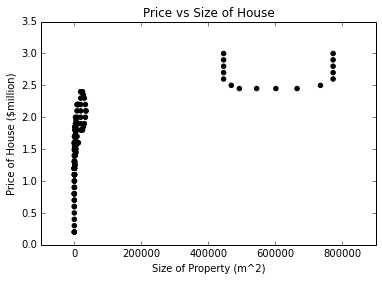

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


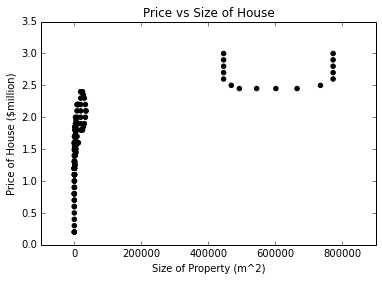

In [2]:
#rename columns to make indexing easier
data.columns = ['size', 'price']

plt.scatter(data.size, data.price,  color='black')
plt.ylabel("Price of House ($million)")
plt.xlabel("Size of Property (m^2)")
plt.title("Price vs Size of House")


We will learn about how to implement cross validation properly soon, but for now let us put the data in a random order (shuffle the rows) and use linear regression to fit a line on 75% of the data.  We will then test the fit on the remaining 25%.  Normally you would use scikit learn's cross validation functions, but we are going to implement the cross validation methods ourself (so you understand what is going on).

DO NOT use this method for doing cross validation.  You will later learn how to do k folds cross-validation using the scikit learn's implementation.  In this tutorial, I implement cross validation manually you intuition for what exactly hold out cross validation is, but in the future we will learn a better way to do cross validation.

In [ ]:
# generate pseudorandom number
# by setting a seed, the same random number is always generated
# this way by following along, you get the same plots
# meaning the results are reproducable.
# try changing the 1 to different numbers
np.random.seed(1)

# shuffle data since we want to randomly split the data
shuffled_data= data.iloc[np.random.permutation(len(data))]

#notice how the x labels remain, but are now random
print shuffled_data[0:5]

#train on the first element to 75% of the dataset
training_data = shuffled_data[0:len(shuffled_data)*3/4]

#test on the remaining 25% of the dataset
#note the +1 is since there is an odd number of datapoints
#the better practice is use shufflesplit which we will learn in a future tutorial
testing_data = shuffled_data[-len(shuffled_data)/4+1:-1]

#plot the training and test data on the same plot
plt.scatter(training_data.size, training_data.price,  color='blue', label='training')
plt.scatter(testing_data.size, testing_data.price,  color='red', label='testing')

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.ylabel("Price of House ($Million)")
plt.xlabel("Size of Land (m^2)")
plt.title("Price vs Size of Land")



In [ ]:
X_train = training_data.size.reshape((len(training_data.size), 1))
y_train = training_data.price.reshape((len(training_data.size), 1))

X_test = testing_data.size.reshape((len(testing_data.size), 1))
y_test = testing_data.price.reshape((len(testing_data.size), 1))


X = np.linspace(0,800000)
X = X.reshape((len(X), 1))

# Create linear regression object
regr = linear_model.LinearRegression()
#Train the model using the training sets
regr.fit(X_train,y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))

plt.plot(X, regr.predict(X), color='black',
         linewidth=3)

plt.scatter(training_data.size, training_data.price,  color='blue', label='training')
plt.scatter(testing_data.size, testing_data.price,  color='red', label='testing')

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)


plt.ylabel("Price of House ($Million)")
plt.xlabel("Size of Land (m^2)")
plt.title("Price vs Size of Land")

We can see here, there is obviously a poor fit.  There is going to be a very high residual sum of squares and there is no linear relationship.  Since the data appears to follow $e^y = x$, we can apply a log transform on the data:

$$y = ln (x)$$

For the purpose of this tutorial, I will apply the log transform, fit a linear model then invert the log transform and plot the fit to the original data.


In [ ]:
# map applied log() function to every element
X_train_after_log = training_data.size.map(log)
#reshape back to matrix with 1 column
X_train_after_log = X_train_after_log.reshape((len(X_train_after_log), 1))

X_test_after_log = testing_data.size.map(log)
#reshape back to matrix with 1 column
X_test_after_log = X_test_after_log.reshape((len(X_test_after_log), 1))


X_after_log = np.linspace(min(X_train_after_log),max(X_train_after_log))
X_after_log = X_after_log.reshape((len(X_after_log), 1))

regr2 = linear_model.LinearRegression()
#fit linear regression
regr2.fit(X_train_after_log,y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr2.predict(X_test_after_log) - y_test) ** 2))

#np.exp takes the e^x, efficiently inversing the log transform

plt.plot(np.exp(X_after_log), regr2.predict(X_after_log), color='black',
         linewidth=3)

plt.scatter(training_data.size, training_data.price,  color='blue', label='training')
plt.scatter(testing_data.size, testing_data.price,  color='red', label='testing')


plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

plt.ylabel("Price of House ($Million)")
plt.xlabel("Size of Land (m^2)")
plt.title("Price vs Size of Land")

The residual sum of squares on the test data after the log transform (0.07) in this example is much lower than before where we just fit the the data without the transfrom (0.32).  The plot even looks much better as the data seems to fit well for the smaller sizes of land and still fits the larger size of land roughly.  As an analysist, one might naively use this model afer applying the log transform.  As we learn't from the last tutorial, ALWAYS plot your data after you transform the features since there might be hidden meanings in the data!

Run the code below to see hidden insight left in the data (after the log transform)


In [ ]:
plt.scatter(X_train_after_log, training_data.price,  color='blue', label='training')
plt.scatter(X_test_after_log, testing_data.price,  color='red', label='testing')
plt.plot(X_after_log, regr2.predict(X_after_log), color='black', linewidth=3)


plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)


The lesson learnt here is always plot data (even after a transform) before blindly running a predictive model!

## Generalized linear models

Now let's exend our knowledge to generalized linear models for the remaining three of the anscombe quartet datasets.  We will try and use our intuition to determine the best model.

In [ ]:
#read csv
anscombe_ii = pd.read_csv('../datasets/anscombe_ii.csv')

plt.scatter(anscombe_ii.x, anscombe_ii.y,  color='black')
plt.ylabel("Y")
plt.xlabel("X")


Instead of fitting a linear model to a transformation, we can also fit a polynomial to the data:

In [ ]:
X_ii = anscombe_ii.x

# X_ii_noisey = X_ii_noisey.reshape((len(X_ii_noisey), 1))
y_ii = anscombe_ii.y
#y_ii = anscombe_ii.y.reshape((len(anscombe_ii.y), 1))

X_fit = np.linspace(min(X_ii),max(X_ii))

polynomial_degree = 2
p = np.polyfit(X_ii, anscombe_ii.y, polynomial_degree)

yfit = np.polyval(p, X_fit)

plt.plot(X_fit, yfit, '-b')

plt.scatter(X_ii, y_ii)

Lets add some random noise to the data, fit a polynomial and calculate the residual error.

In [ ]:
np.random.seed(1)

x_noise = np.random.random(len(anscombe_ii.x))

X_ii_noisey = anscombe_ii.x + x_noise*3

X_fit = np.linspace(min(X_ii_noisey),max(X_ii_noisey))

polynomial_degree = 2
p = np.polyfit(X_ii_noisey, anscombe_ii.y, polynomial_degree)

yfit = np.polyval(p, X_fit)

plt.plot(X_fit, yfit, '-b')

plt.scatter(X_ii_noisey, y_ii)


print("Residual sum of squares: %.2f"
      % np.mean((np.polyval(p, X_ii_noisey) - y_ii)**2))



Now can we fit a larger degree polynomial and reduce the error? Lets try and see:

In [ ]:
polynomial_degree = 5
p2 = np.polyfit(X_ii_noisey, anscombe_ii.y, polynomial_degree)

yfit = np.polyval(p2, X_fit)

plt.plot(X_fit, yfit, '-b')

plt.scatter(X_ii_noisey, y_ii)


print("Residual sum of squares: %.2f"
      % np.mean((np.polyval(p2, X_ii_noisey) - y_ii)**2))

What if we use a really high degree polynomial?  Can we bring the error to zero?  YES!

In [ ]:
polynomial_degree = 10
p2 = np.polyfit(X_ii_noisey, anscombe_ii.y, polynomial_degree)

yfit = np.polyval(p2, X_fit)

plt.plot(X_fit, yfit, '-b')

plt.scatter(X_ii_noisey, y_ii)


print("Residual sum of squares: %.2f"
      % np.mean((np.polyval(p2, X_ii_noisey) - y_ii)**2))

It is intuitive to see that we are overfitting since the high degree polynomial hits every single point (causing our mean squared error (MSE) to be zero), but it would generalize well.  For example, if x=5, it would estimate y to be -45 when you would expect it to be above 0.

when you are dealing with more than one variable, it becomes increasingly difficult to prevent overfitting, since you can not plots past four-five dimensions (x axis,y axis,z axis, color and size).  For this reason we should always use cross validation to reduce our variance error (due to overfitting) while we are deducing bias (due to underfitting).  Throughout the course we will learn more on what this means, and learn practical tips.

The key takeaway here is more complex models are not always better.  Use visualizations and cross validation to prevent overfitting!  (We will learn more about this soon!)

Now, let us work on the third set of data from quartet

In [ ]:
#read csv
anscombe_iii = pd.read_csv('../datasets/anscombe_iii.csv')

plt.scatter(anscombe_iii.x, anscombe_iii.y,  color='black')
plt.ylabel("Y")
plt.xlabel("X")


It is obvious that there is an outlier which is going to cause a poor fit to an ordinary linear regression.  One way is filtering out the outlier.  One method could be to manually hardcode any value which seems to be incorrect.  A better method would be to remove any point which is a given standard deviation away from the linear model, then fit a line to remaining data points.  Arguably, an even better method could be using the RANSAC algorithm (demonstrated below) from the Scikit learn [documentation on linear models](http://scikit-learn.org/stable/modules/linear_model.html#ransac-regression) or using [Thiel-sen regression](http://scikit-learn.org/stable/modules/linear_model.html#theil-sen-estimator-generalized-median-based-estimator)


In [ ]:
from sklearn import linear_model
X_iii = anscombe_iii.x.reshape((len(anscombe_iii), 1))

#bit basic linear model
model = linear_model.LinearRegression()
model.fit(X_iii, anscombe_iii.y)

# Robustly fit linear model with RANSAC algorithm
model_ransac = linear_model.RANSACRegressor(linear_model.LinearRegression())
model_ransac.fit(X_iii, anscombe_iii.y)

inlier_mask = model_ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

plt.plot(X_iii,model.predict(X_iii), color='blue',linewidth=3, label='Linear regressor')
plt.plot(X_iii,model_ransac.predict(X_iii), color='red', linewidth=3, label='RANSAC regressor')
plt.plot(X_iii[inlier_mask], anscombe_iii.y[inlier_mask], '.k', label='Inliers')
plt.plot(X_iii[outlier_mask], anscombe_iii.y[outlier_mask], '.g', label='Outliers')

plt.ylabel("Y")
plt.xlabel("X")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)


The takeaway here to read the [documentation](http://scikit-learn.org/stable/index.html), and see if there is an already implemented method of solving a problem. Chances there are already prepackaged solutions, you just need to learn about them.  Lets move on to the final quatet. 

In [ ]:
#read csv
anscombe_ii = pd.read_csv('../datasets/anscombe_iv.csv')

plt.scatter(anscombe_ii.x, anscombe_ii.y,  color='black')
plt.ylabel("Y")
plt.xlabel("X")

In this example, we can see that the X axis values stays constant except for 1 measurement where x varies.  Since we are trying to predict y in terms of x, as an analyst I would would not use any model to describe this data, and state that more data with different values of X would be required.


The takeaway here is that sometimes a useful model can not be made (garbage in, garbage out) until better data is avaliable.

## Bonus example: Piecewise linear curve fitting

While I usually prefer to use more robustly implemented algorithms such as ridge or decision tree based regresion (this is because for many features it becomes difficult to determine an adequete model for each feature), regression can be done by fitting a piecewise fuction. Taken from [here](http://stackoverflow.com/questions/29382903/how-to-apply-piecewise-linear-fit-in-python).

In [ ]:
import numpy as np

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], dtype=float)

y = np.array([5, 7, 9, 11, 13, 15, 28.92, 42.81, 56.7, 70.59, 84.47, 98.36, 112.25, 126.14, 140.03])

plt.scatter(x, y)


In [ ]:
from scipy import optimize

def piecewise_linear(x, x0, y0, k1, k2):
    return np.piecewise(x, [x < x0], [lambda x:k1*x + y0-k1*x0, lambda x:k2*x + y0-k2*x0])

p , e = optimize.curve_fit(piecewise_linear, x, y)
xd = np.linspace(0, 15, 100)
plt.scatter(x, y)

plt.plot(xd, piecewise_linear(xd, *p))

## Bonus example 2: Piecewise Non-linear Curve Fitting

Now let us extend this to piecewise non-linear Curve Fitting.  Taken from [here](http://stackoverflow.com/questions/34089934/plotting-a-piece-wise-fit-to-non-linear-data)

In [ ]:
#Piecewise function defining 2nd deg, 1st degree and 3rd degree exponentials
def piecewise_linear(x, x0, x1, y0, y1, k1, k2, k3, k4, k5, k6):
    return np.piecewise(x, [x < x0, x>= x0, x> x1], [lambda x:k1*x + k2*x**2, lambda x:k3*x + y0, lambda x: k4*x + k5*x**2 + k6*x**3 + y1])
#Getting data using Pandas

df = pd.read_csv("../datasets/non-linear-piecewise.csv")
ms = df["ms"].values
degrees = df["Degrees"].values

plt.scatter(ms, degrees)

    


In [ ]:
#Setting linspace and making the fit, make sure to make you data numpy arrays
x_new = np.linspace(ms[0], ms[-1], dtype=float)
m = np.array(ms, dtype=float)
deg = np.array(degrees, dtype=float)
guess = np.array( [100, 500, -30, 350, -0.1, 0.0051, 1, -0.01, -0.01, -0.01], dtype=float)
p , e = optimize.curve_fit(piecewise_linear, m, deg)
#Plotting data and fit
plt.plot(x_new, piecewise_linear(x_new, *p), '-', ms[::20], degrees[::20], 'o')


## Key takeaways:

1. Always visualize data (exploratory data analysis) before fitting any model
2. There are many methods of regression, use intuition and statistics knowledge to choose the best method based on visualization and summary statistics.
3. Always use cross validation and understand the bias vs variance trade-off when doing regression.

## Further reading:

Chapter 7 (non-linear regression) of [Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/)

### Scikit Learn documentation:

[Linear models](http://scikit-learn.org/stable/modules/linear_model.html)

[Isotonic regression example](http://scikit-learn.org/stable/auto_examples/plot_isotonic_regression.html) 

We learn about decision trees later in the couse, but [decision trees](http://scikit-learn.org/stable/modules/tree.html#tree) can be used for regression as well, as shown in this [example](http://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html).  We also learn about the [nearest neighbour](http://scikit-learn.org/stable/modules/neighbors.html) algorithm which can be used for regression in this [example](http://scikit-learn.org/stable/auto_examples/neighbors/plot_regression.html)


## Homework

Now that you have seen some of the examples of regression using linear models, see if you can predict the MPG of the car given all of its other attributes. Use the [Auto MPG Data Set ](https://archive.ics.uci.edu/ml/datasets/Auto+MPG) from the CMU StatLib machine learning library.  I have included the data in the ../datasets folder.  The .data file is the from the CMU page, and the .csv is after I applied some data cleaning. 